/tmp/ipykernel_1423968/969008665.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)


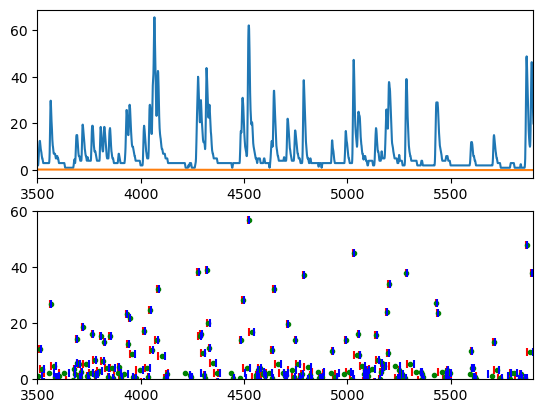

In [11]:
import matplotlib.pyplot as plt
import math

# f = open('data/retrace.csv')
# tokens = [e.split(",") for e in f.readlines()]
# x = [int(e[0]) for e in tokens]
# y = [int(e[1]) for e in tokens]
# handle = plt.plot(x,y)

delta = 0
def get_trace_file(filename, I):
    f = open(filename, 'r')
    tokens = [[float(x) for x in e.split(",")] for e in f.readlines()]
    tokens = [e for e in tokens if I[0] <= e[0] <= I[1]]
    x = [e[0] for e in tokens]
    y = [e[1] for e in tokens]
    return (x,y)

def get_detect_file(filename, I):
    f = open(filename, 'r')
    tokens = [[float(x) for x in e.split(",")] for e in f.readlines()]
    tokens = [e for e in tokens if I[0] <= e[0] <= I[1]]
    x = [e[0] for e in tokens]
    y = [e[1] for e in tokens]
    c = ['r' if e[2] == 1 else ('g' if e[2] == 0 else 'b') for e in tokens]
    return (x,y,c)

def get_event_file(filename, I):
    f = open(filename, 'r')
    tokens = [[float(x) for x in e.split(",")] for e in f.readlines()]
    tokens = [e for e in tokens if I[0] <= e[0] <= I[1]]
    tokens = [e for e in tokens if e[2] == e[2]]
    tokens = [e for e in tokens if e[2] > 0]
    #tokens = [e for e in tokens if abs(e[2]) > 2]
    x = [e[0] for e in tokens]
    y = [e[1] for e in tokens]
    x1 = [e[0] - e[2] for e in tokens]
    x2 = [e[0] + e[2] for e in tokens]
    return (x,y,x1,x2)



I = (3500,5900)

(x,y) = get_trace_file('Saves/output_smoothed.csv',I)
plt.subplot(2,1,1)
plt.xlim(I)
plt.plot(x,y)

(x,y) = get_trace_file('Saves/output_baselined.csv',I)
plt.subplot(2,1,1)
plt.xlim(I)
plt.plot(x,y)


(x4,y4,x14,x24) = get_event_file('Saves/output_pulse.csv',I)
plt.subplot(2,1,2)
plt.xlim(I)
plt.ylim((-0.2,60))
plt.scatter(x14,y4,marker='|',color='r')
plt.scatter(x4,y4,marker='.',color='g')
plt.scatter(x24,y4,marker='|',color='b')


In [ ]:
f = open('trace2.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
handle = plt.plot(vals)

f = open('trace4.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
handle = plt.plot(vals)

In [ ]:
f = open('event1.csv')
events = [e.split(',') for e in f.readline().split(';')[:-1]]
cols = [['r','g','b'][int(e[0]) + 1] for e in events]
times = [int(e[1]) for e in events]
peaks = [int(e[3]) for e in events]
upper = [int(e[2]) + int(e[5]) for e in events]
lower = [int(e[2]) - int(e[5]) for e in events]
f = open('trace.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
plt.plot(vals)
plt.scatter(times,peaks,color = cols)
plt.scatter(times,upper,marker='^', color = "y")
plt.scatter(times,lower,marker='_', color = "c")


In [ ]:
f = open('event2.csv')
events = [e.split(',') for e in f.readline().split(';')[:-1]]
cols = [['r','g','b'][int(e[0]) + 1] for e in events]
times = [int(e[1]) for e in events]
peaks = [int(e[3]) for e in events]
upper = [int(e[3]) + int(e[5]) for e in events]
lower = [int(e[3]) - int(e[5]) for e in events]
f = open('trace.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
plt.plot(vals)
plt.scatter(times,peaks,color = cols)
plt.scatter(times,upper,marker='_', color = "y")
plt.scatter(times,lower,marker='', color = "c")


In [ ]:
tf = open('trace.csv')
f1 = open('event1.csv')
f2 = open('event2.csv')
f3 = open('event3.csv')
f4 = open('event4.csv')

def plot_graph(f,tf):
    events = [e.split(',') for e in f.readline().split(';')[:-1]]
    traces = [int(e) for e in tf.readline().split(',')[:-1]]
    plt.plot(traces)

    key = "-1"
    times = [int(e[1]) for e in events if e[0] == key]
    values = [int(e[3]) for e in events if e[0] == key]
    plt.scatter(times,values,marker = '_', color = 'b')

    key = "0"
    times = [int(e[1]) for e in events if e[0] == key]
    values = [int(e[3]) for e in events if e[0] == key]
    plt.scatter(times,values,marker = '.', color = 'g')

    key = "1"
    times = [int(e[1]) for e in events if e[0] == key]
    values = [int(e[3]) for e in events if e[0] == key]
    plt.scatter(times,values,marker = '^', color = 'r')

plot_graph(f1,tf)

In [ ]:
tf = open('trace.csv')
f1 = open('event1.csv')
f2 = open('event2.csv')
f3 = open('event3.csv')
f4 = open('event4.csv')

def plot_fd_graph_key(events,key, marker, col1,col2):
    events = [event[1:] for event in events if int(event[0]) == key]
    start = [e[:3] for e in events]
    end = [e[3:] for e in events]
    times = [int(e[0]) for e in start]
    values = [int(e[1]) for e in start]
    plt.scatter(times,values,marker = marker, color = col1)
    times = [int(e[0]) for e in end]
    values = [int(e[1]) for e in end]
    plt.scatter(times,values,marker = marker, color = col2)

def plot_fd_graph_type(events,type,col1,col2):
    events = [event[1:] for event in events if int(event[0]) == type]
    print(events)

    plot_fd_graph_key(events, -1, "_",col1,col2)
    plot_fd_graph_key(events, 0, ".",col1,col2)
    plot_fd_graph_key(events, 1, "^",col1,col2)

def plot_fd_graph(f,tf):
    events = [e.split(',') for e in f.readline().split(';')[:-1]]
    traces = [int(e) for e in tf.readline().split(',')[:-1]]
    plt.plot(traces)
    plot_fd_graph_type(events,0,'r','pink')
    plot_fd_graph_type(events,1,'b','lightblue')


plot_fd_graph(f4,tf)

In [ ]:
plot_graph(f3,tf)

\begin{align*}
f(x) &= A\exp(-\frac{(x - \mu)^2}{2\sigma^2}) + B
\\
\ln(f(x) - B) &= \ln(A) - \frac{(x - \mu)^2}{2\sigma^2}
\\
f'(x) &= - \frac{x - \mu}{\sigma^2}(f(x) - B)
\\
f''(x) &= - \frac{1}{\sigma^2}(f(x) - B) - \frac{x - \mu}{\sigma^2}f'(x)
\\
 &= - \frac{1}{\sigma^2}(f(x) - B) + \frac{(x - \mu)^2}{\sigma^4}(f(x) - B)
\\
 &= (\frac{(x - \mu)^2}{\sigma^2} - 1)\frac{f(x) - B}{\sigma^2}
\end{align*}


Let $x_i,y_i,y_i'$ be defined for $i = 1,2$ such that $f(x_i) = y_i, f'(x_i) = y_i'$, then:
\begin{align*}
\ln(y_i - B) &= \ln(A) - \frac{(x_i - \mu)^2}{2\sigma^2}
\\
\frac{y'_i}{y_i - B} &= - \frac{x_i - \mu}{\sigma^2}
\end{align*}
So we have:
\begin{align*}
\ln(y_1 - B) &= \ln(A) - \frac{(x_1 - \mu)^2}{2\sigma^2}
\\
\frac{y'_1}{y_1 - B} &= - \frac{x_1 - \mu}{\sigma^2}
\\
\ln(y_2 - B) &= \ln(A) - \frac{(x_2 - \mu)^2}{2\sigma^2}
\\
\frac{y'_2}{y_2 - B} &= - \frac{x_2 - \mu}{\sigma^2}
\end{align*}

These can be combined to get
\begin{align*}
\ln(y_1 - B) &= \ln(A) - \frac{y'_1}{y_1 - B}\frac{x_1 - \mu}{2}
\\
\ln(y_2 - B) &= \ln(A) - \frac{y'_2}{y_2 - B}\frac{x_2 - \mu}{2}
\\
\ln(y_1 - B) - \ln(y_2 - B) &= \frac{y'_2}{y_2 - B}\frac{x_2 - \mu}{2} - \frac{y'_1}{y_1 - B}\frac{x_1 - \mu}{2}
\end{align*}